In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew

from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper.

In [2]:
ads = pd.read_csv('Advertising.csv')
ads.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
ads.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [4]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


**Remove the index column**

In [5]:
ads.drop(['Unnamed: 0'], axis=1, inplace = True)
ads.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


**Exploratory Data Analysis**

<AxesSubplot:xlabel='sales', ylabel='Density'>

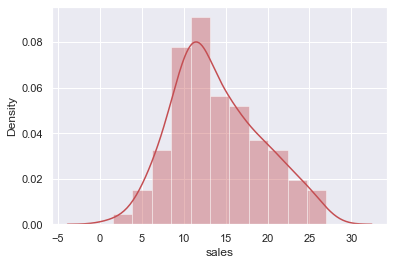

In [6]:
sns.set();sns.distplot(ads.sales, color = 'r')

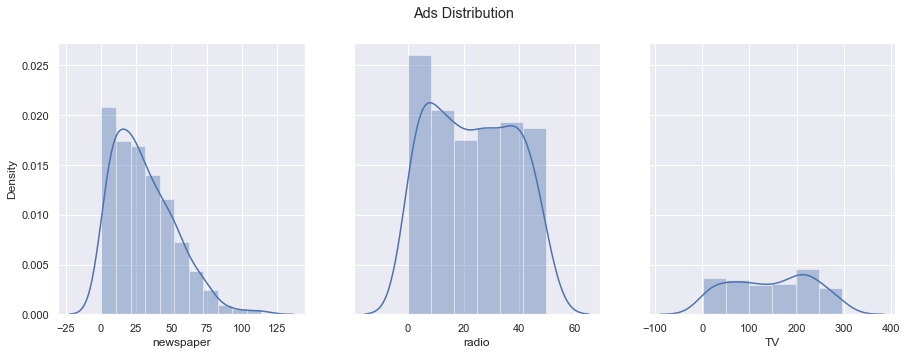

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Ads Distribution')

sns.distplot(ads.newspaper, ax=axes[0])
sns.distplot(ads.radio,ax=axes[1])
sns.distplot(ads.TV,ax=axes[2])

plt.show()

The advertisement spending on newspaper is skewed to the right, whereas there are uniform distributions for both Radio and TV. The expense on TV advertisement is comparetively low compared to others two channels.

**Exploring Relationships between Predictors and Response**

<AxesSubplot:>

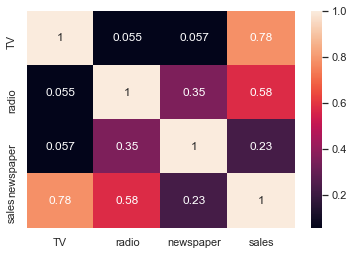

In [8]:
sns.heatmap(ads.corr(), annot= True)

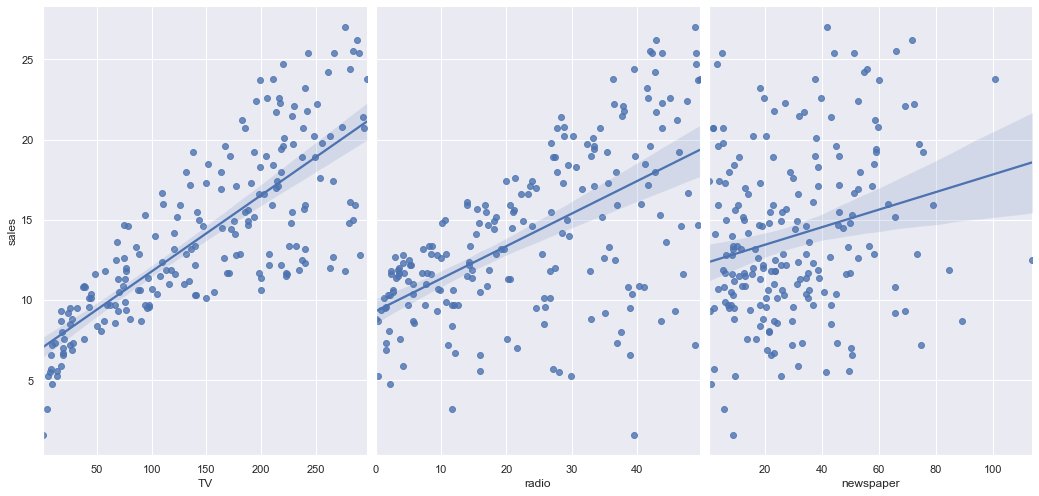

In [9]:
sns.pairplot(ads, x_vars =['TV','radio','newspaper'], y_vars ='sales', height=7, aspect =0.7, kind ='reg')

There is strong positive correlation between TV and Sales i.e. 0.78 followed by Radio and Newspaper - extremely weak and almost no relationship with sales.

***

**Creating the Simple Linear Regression Model**

General linear regression model:
$y=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+...+\beta_{n}x_{n}$

- $y$  is the response
- $\beta_{0}$ is the intercept
- $\beta_{1}$ is the coefficient for  x1  (the first feature)
- $\beta_{n}$ is the coefficient for  xn  (the nth feature)

In our case: $y=\beta_{0}+\beta_{1}×TV$

The $\beta$ values are called the **model coefficients*:

- These values are "learned" during the model fitting step using the "least squares" criterion
- The fitted model is then used to make predictions

In [10]:
X = ads[['TV']]
y = ads.sales

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =1)

In [12]:
print(X_train.shape)

(150, 1)


In [13]:
print(X_test.shape)

(50, 1)


In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
print(model.intercept_)
print(model.coef_)

6.91197261886872
[0.04802945]


In [16]:
y_pred = model.predict(X_test)

**Model Evaluation Metrics**

In [17]:
from sklearn import metrics

print ("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print ("Mean Squared Error:",metrics.mean_squared_error(y_test,y_pred))
print ("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 2.4643080986027908
Mean Squared Error: 10.310069587813155
Root Mean Squared Error: 3.210929707703542


***

**Creating the Multiple Linear Regression Model**

<h5 align=center>$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 +...+ \beta_p X_p + \epsilon$$ </h5>
<h5 align=center> $$sales = \beta_0 + \beta_1 \times TV + \beta_2 \times radio + \beta_3 \times newspaper + \epsilon$$ </h5>

**Multiple Linear Regression - Estimating Coefficients**

In [18]:
from sklearn.linear_model import LinearRegression

X = ads[['TV','radio','newspaper']]
y = ads.sales
model2 = LinearRegression()
model2.fit(X, y)

list(zip(['TV','radio','newspaper'], model2.coef_))

[('TV', 0.045764645455397615),
 ('radio', 0.18853001691820456),
 ('newspaper', -0.0010374930424763272)]

In [19]:
print(model2.intercept_)

2.9388893694594085


**Feature Selection**

Let's use train/test split with RMSE to see whether newspaper should be kept in the model:

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = ads[['TV','radio','newspaper']]
y = ads.sales
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =1)

lm =LinearRegression()
lm.fit(X_train,y_train)

lm_pred = lm.predict(X_test)

print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test,lm_pred)))
print("R^2 :", r2_score(y_test,lm_pred))

RMSE : 1.404651423032895
R^2 : 0.9156213613792232


In [32]:
X = ads[['TV','radio']]
y = ads.sales
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =1)

lm2 =LinearRegression()
lm2.fit(X_train,y_train)

lm2_pred = lm2.predict(X_test)

print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test,lm2_pred)))
print("R^2 :", r2_score(y_test,lm2_pred))

RMSE : 1.3879034699382886
R^2 : 0.9176214942248908


The second model shows that R$^2$ score slightly increase to 0.917 whereas the RMSE is decreased to 1.38 compared to the first model. It can be concluded that the model2 should be used from now on since inclusion of the feature 'newspaper' doesnt provide real improvement and could lead to poor result due to overfitting.

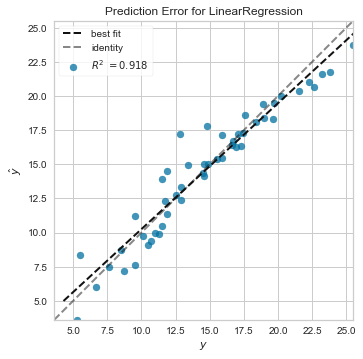

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [33]:
#!pip install yellowbrick

from yellowbrick.regressor import PredictionError, ResidualsPlot

visualizer = PredictionError(lm2).fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.show()

There is unexplained data variability that the model is unable to capture due to the fact that either the model should be non-linear or the synergy effect that is not considered in the model.

**Interaction Effect (Synergy)**

One way to improve the model is by intoducing the 3rd parameter which is the interaction i.e. multiplication of TV * radio.


In [29]:
ads['interaction'] = ads['TV'] * ads['radio']

X = ads[['TV','radio','interaction']]
y = ads.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =1)

lm3 =LinearRegression()
lm3.fit(X_train,y_train)

lm3_pred = lm3.predict(X_test)

print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test,lm3_pred)))
print("R^2 :", r2_score(y_test,lm3_pred))

RMSE : 0.7011871137164325
R^2 : 0.9789736814681261


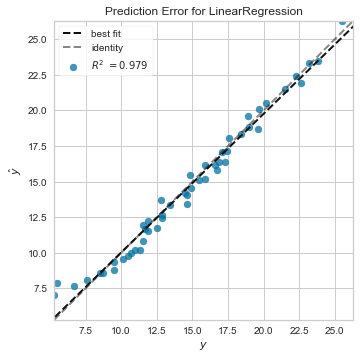

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [30]:
visualizer = PredictionError(lm3).fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.show()

By introducting the interaction parameter, the performance of the model increases significantly i.e. R$^2$ score increases to 0.97 whereas the RMSE decreases to 0.7.